<a href="https://colab.research.google.com/github/leoss14/RL/blob/main/RL_project_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Optimizing monetary policy for central banking using Reinforcement Learning

__Authors:__

Krisha Chandnani

Ignacio Orueta

Leonardo Luksic

## ABSTRACT

This project trains a Reinforcement Learning (RL) algorithm to compute optimal interest rate reaction functions as a central bank. We first use quarterly data from the US Federal Reserve bank to estimate the transition equations of a simulated environment (i.e., inflation and output gap) by specifying linear (OLS) and non-linear (ANN) models. Here, the non-linear model reduces MSE by 10.6% to hte OLS benchmark, highlighting its advantage in modelling complex relationships.

We then train optimal policies with this simulated environment and evaluate the algorithm performance by comparing it the most common benchmark in the literature (i.e., the Taylor rule). In line with Hinterlang and \& Tanzer (2021), our RL algorithm shows a reduced central bank's loss than the Taylor rule by over __XX__.

## 1. INTRODUCTION

Central banks' main objective is to maintain low inflation while promoting maximum employment. These two objectives are generally seen as complementary. To accomplish this, they set the interest rate levels $i_t$ in each period. The strategy of determining $i_t$ is one of the most debated optimization problems in macroeconomics, which is often described by a simple interest rate reaction function, which responds to inflation and the difference between actual output and the output that maximizes employment (i.e., the output gap). (Taylor, 1993).

However, while this approach tries to represent the actual interest rate setting behaviour of central banks, is still on debate whether this policy function is optimal with respect to fulfilling central banks' objectives given their inflation and output gap targets. (Hinterlang & Tanzer, 2021). The assumption of linear relationships and fixed coefficients in these frameworks often restricts their ability to capture complex, nonlinear economic dynamics. This limitation becomes particularly important during periods of economic volatility, where traditional models may fail to account for structural changes and nonlinearities. (Ballesteros, et al., 2025).

In this project, we follow prior research by Hinterlang & Tanzer (2021) and Ballesteros, et al. (2025) to explore applications of Reinforcement Learning (RL) algorithms to obtain an optimal monetary policy rule for the U.S. Federal Reserve. Using data from this central bank and the Bank of England, respectively, both studies have shown that RL can significantly reduce central bank losses by adapting policies dynamically to economic conditions. As monetary policy can be framed as a sequential decision-making problem, the RL agent can learn from interactions with the environment, optimizing the nominal interest rate to achieve inflation and output gap targets. In line with previous studies, here we show that, using data from the U.S. Federal Reserve, RL-optimized policies outperform traditional rules of monetary policy.


## 2. LITERATURE REVIEW

Central Banks face challenges with balancing the stability of consumer prices and overall economic performance, such as employment rates. This commonly referred to as a dual mandate. Price stability is considered a prerequisite for long-term economic growth, as it preserves the purchasing power of money and reduces uncertainty. Simultaneously, central banks strive to achieve maximum employment without generating excessive inflationary pressures. A predominant strategy adopted by many central banks since the 1990s is inflation targeting. This framework involves publicly announcing a target rate or range for inflation, typically around 2-3% per year, and adjusting monetary policy instruments accordingly.

Economic theory and historical experience suggest potential short-run trade-offs between inflation and unemployment, often conceptualized through the Phillips curve relationship.
Policies designed to curb high inflation, such as increasing interest rates to cool down the economy, may lead to slower economic growth and higher unemployment in the short term. Conversely, expansionary policies aimed at boosting employment might fuel inflationary pressures.

While linear models such as the Taylor Rule offer simplicity, they struggle with real-time data limitations, non-linear economic dynamics, and constraints like the zero lower bound (ZLB). Recent research has used Reinforcement Learning and Neural Networks to construct credible alternatives to the widely used linear models. Hinterlang & Tanzer (2021) show RL-derived policies reduce quadratic loss functions by over 40% compared to the Taylor Rule in simulations, particularly under non-linear economic models. RL also handles constraints like ZLB by restricting action spaces.

On the other hand, DQN algorithms learn optimal policies by balancing exploration (testing new actions) and exploitation (using known effective actions). They also allow to adapt to complex and non-linear relationship, as well multi-objective trade-offs. Chen et al. (2021) demonstrate RL agents stabilize economies even when traditional models fail due to simultaneous monetary-fiscal policy interactions.


## 3. METHODOLOGY

### 3.1 Problem definition

The central's bank objetive is to minimize the gaps between actual and target inflation, and actual and potential output. This can be framed as a RL task, where the central bank determines its optimal reaction function for the nominal interest rate by interacting with the proposed economic environment. This environment evolves based on historical data. (Ballesteros, et al., 2025).

The minimization process led by the central bank operates within a dynamic programming framework. For each time period, the agent receives a reward based on deviations of inflation and the output gap from their respective targets, guiding it to optimize the following loss function:

$$\mathcal{L} = E[∑_{t=0}^T\gamma^t(\omega_\pi(\pi_t-\pi^*)^2 + \omega_y(y_t -y^*)^2)]$$

where $\pi^*$ and $y^∗$ are the inflation and output targets, respectively, $\gamma$ is the discount factor, and $\omega_\pi$, $\omega_y$ are weights reflecting the relative importance of stabilizing inflation and the output gap. The reward function is defined explicitly in the environment, where the agent’s action ($i_t$) directly impacts future states of inflation ($\pi_{t+1}$) and the output ($y_{t+1}$), creating a feedback loop that facilitates learning.


### 3.2 Data

In order to create the environment, we use historical data from the U.S. Federal Reserve, covering quarterly periods from 1955 to 2024. This data includes quarterly information on inflation rates, output gap estimates and interest rates.


### 3.3 Reinforcement Learning framework


#### 3.3.1 Markow Decision Process (MDP)

MDPs formally describe an environment for the problem of learning. Here, the agent interacts with a fully observable environment at each discrete time step $t= 0,1,2,3,4...T$. (Sutton & Barto,1998). At each time step $t$, the agent receives some representation of the environment’s state, $S_t$, where $S_t \in S$, and on that basis selects an action, $A_t$, where $A_t \in A(s)$. One time step later, the agent receives a reward, $R_t+1$, where $R \rightarrow R$, and finds itself in a new state, $S_t+1$. The MDP and agent together thereby give rise to a sequence or trajectory that begins like this:

$$S_0,A_0,R_1,S_1,A_1,R_2,S_2,A_2,R_3...$$

Environment state $S$ is a state sequence with an initial state $s_0$. For environment conditions $S$, actions $A$ are accessible. Reward function $R$ is a map of immediate rewards for a given state-action pair. The likelihood of transitioning from states $s_0,...,s_i$ to state $s_{i+1}$ is known as state transition probability ($P$). However, because the environment has endless state sequences, calculating the transition probability for all of them is impossible. Therefore, MDP is based on the Markov assumption, which claims that the probability of transitioning to a new state $s_{i+1}$ is only dependent on
$s_i$ instead of past states (Hermanns, 2002), which suggests that:

$$P(s_{i+1}| s_i,a_i,...s_0,a_0) \approx P(s_{i+1}|s_i,a_0)$$


The discount factor $\gamma$ discounts the rewards of future states that contribute to the total reward (Littman, 1994). The formula below can be used to calculate the discounted future rewards:

$$R_t(s) = r_t + \gamma r_{t+1} + \gamma^2 r_{t+2} + ... + \gamma^{n-t} r_{n}=\sum_{t\geq0}\gamma^tR_{a,t}(s_t,s_{t+1})$$
The value function can estimate the value of a state sequence beginning with state $s$:

$$V^\pi(s) = E[\sum_{t\geq0}\gamma^tr_t]$$

The optimal is one that produces the highest value for all states:
$$V^\pi(s) = max_\pi V^\pi(s)$$


#### 3.3.2 Deep Q-Learning (DQN)

Deep Q-Learning extends the basic Q-Learning algorithm by utilizing deep neural networks to approximate Q-values. While traditional Q-Learning is effective for environments with a small and finite number of states (e.g., discrete states), it faces challenges with large or continuous state spaces due to the extensive size of the Q-table. Deep Q-Learning addresses this issue by replacing the Q-table with a neural network, which can approximate Q-values for every state-action pair. (Amin, 2024).

DQN is a model-free reinforcement learning algorithm that compares the expected utility of available actions of each state, without requiring a model of the environment (i.e., model-free). It can handle problems with stochastic transitions and rewards without requiring adaptations. (Li, 2023).

This algorithm learns the optimal Q-function, based on the Bellman optimality equation. In this project, we focus on the tabular Q-Learning with a finite Markov Decision Process (MDP) and discrete states ($t$) and actions (interest rates). In this case, the Bellman equation suggests the following Q-value function:

$$Q(s,a) = arg \: \underset{a}{\max} \: Q^{\pi^{*}}(s,a)$$

Given a state $s$, the Q-value function estimates the highest future reward achievable by performing action $a$. By considering the maximum discounted future reward for an agent transitioning from state $s_t$ to $s_{t+1}$ with learning rate $\alpha$, the Q-value function can iteratively converge to the optimal Q-value function (Sutton & Barto,1998), as illustrated below:

$$Q_{t+1}(s_t,a_t) = Q(s_t,a_t) + α[r_{t+1} + \gamma \underset{a}{\max} \: Q_t(s_{t+1},a) - Q_t(s_t,a_t)]$$

In this case, the learned action-value function ($Q$) directly approximates $q*$, the optimal action-value function, independent of the policy being followed.

Then, the substitution of the value function and Q-Learning function is shown as:

$$V^*(s) =  \underset{a}{\max} \: Q^*(s,a)$$

And the optimal policy is retrieved from the optimal value function:

$$\pi^*(s) = arg \; \underset{a}{\max} \: Q^*(s,a) $$

In our project, the observation space (i.e. inflation and output gap) is highly dimensional, so we need to approximate the value function by utilising neural networks. Deep Q-learning is also more suited at capturing non-linear relationships between the factors of analysis and at handling stochasticity. As an environment, the economy is highly volatile and subject to shocks, where the same action may result in multiple different outcomes. This is also why a model-free algorithm is preferred, as it does not need to construct transitions between different states. Finally, DQN is more suited in dealing with discrete action spaces, as central banks increase their rates in intervals of 0.25%.



### 3.4 Definitions

#### 3.4.1 The environment

The RL framework requires the provision of an environment that determines the next observations in response to the agent's actions (see Figure 1). In our application, the environment represents the economy excluding the central bank. We construct this by using the Gymnasium framework and following Hinterlang & Tanzer (2021) on modelling the economy through two key functions:

$$
y_t = f_{y_t} (y_{t-1},y_{t-2},\pi_{t-1},\pi_{t-2},i_{t-1},i_{t-2}) + \epsilon_{y,t},
$$

$$
\pi_t = f_\pi(y_t,y_{t-1},y_{t-2},\pi_{t-1},\pi_{t-2},i_{t-1}) + \epsilon_{\pi,t},
$$

Where the functions $f_y$ and $f_\pi$ are estimated using machine learning models, such as linear regression (OLS) and Artificial Neural Networks (ANNs), to capture both linear and nonlinear dynamics.

Figure 1: RL scheme for finding the optimal interest rate in central banking

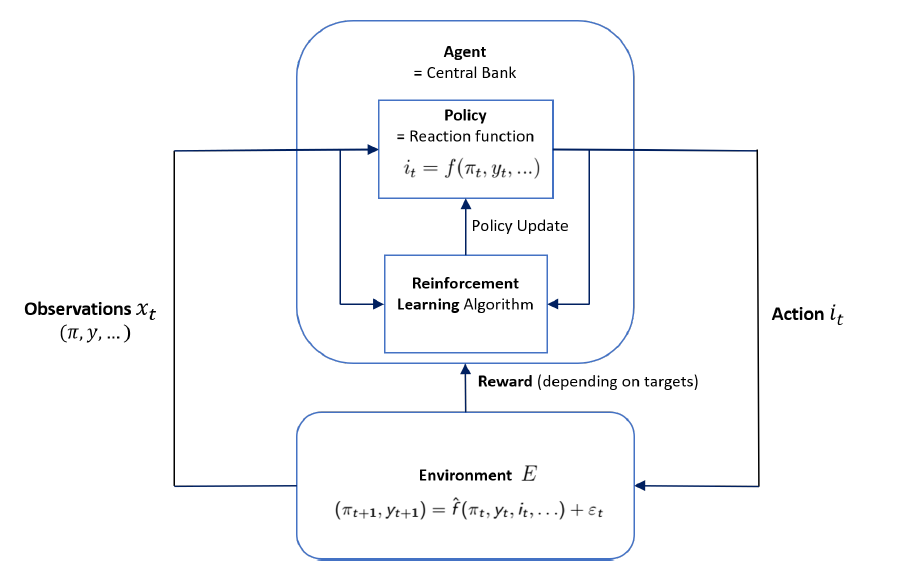

Source: Hinterlang & Tanzer (2021).

The linear model is used as a baseline, given it reflects how standard economic frameworks handle the relationship between inflation, output gaps and interest rates. They benefit from increased interpretability and easier communication with policymakers. Nevertheless, due to nonlinear dynamics (such as economical, political and resource shocks), linear models cannot fully capture economic outlook.

To address this, we utilize neural networks. Unlike linear models, neural networks do not impose predefined functional forms, allowing them to better capture complex interactions between inflation, output and interest rates. With this, if the predictions of the linear and neural network models align, the linear model is preferred for its simplicity and interpretability. However, if there are significant discrepancies between models, the nonlinear neural network model offers new approaches to handle unanticipated crises, where conventional relationships may break down. This dual-model approach serves both as a robustness check and as a potential new method for integrating machine learning tools into central bank decision-making processes.

#### 3.4.2 The agent
The agent in this framework is the central bank. It observes certain state variables that serve as inputs to the policy function, but does not know the transition equations. These states variables are the lagged inflation rate and output gap. Given these observations in each period, the central bank sets a nominal interest rate and receives a reward, which is derived from the loss function.

#### 3.4.3 The Objective
In order to adjust the monetary policy in an optimal way, we need to determine the respective action value function for each state, as it works as a measure of performance for policy interventions and thus constitutes the basis for policy updates (Hinterlang \& Tanzer, 2021):

$$Q^P(\pi_t,y_t)=\mathbb{E}[R_t|\pi_t,y_t,i_t]$$

with
$$R_t=∑^T_{i=t}\gamma^{i-t}r_t(\pi_t,y_t,i_t)$$

The function $Q^P$ describes the expected return after taking action $i_t$, observing state $\pi_t,y_t$, and following an specific policy thereafter. This recursive relationship is based on the Bellman equation. (Hinterlang & Tanzer, 2021). Then, the return $R_t$ is defined as the sum of discounted future rewards with a discount
factor of $\gamma= 0.99$, which is the mainstream in monetary policy frameworks (Svensson (2020)).

#### 3.4.4 Action and observation space
The agent selects an action corresponding to the nominal interest rate adjustment, which is set as a positive value. We define discrete values for $i_t$ that increase in increments of 0.5. We also set a maximum value of 20, so $i_t$ ranges from 0 to 20, with 41 possible choices. This is a common range for central bank's interest rates. On the other hand, for each period, the observation space consist of the continuous values of the lagged inflation, lagged output gap and lagged interest rate.

#### 3.4.5 Rewards, goal and evaluation

The rewards function incentivizes the minimization of the deviations of inflation and the output gap:
$$r_t(\pi_t,y_t,i_t)= -\omega_\pi(\pi_{t+1}-\pi^*)^2 -\omega_y(y_t -y^*)^2$$

where $\pi^*=2\%$, and we assign equal weights for each target (i.e., $\omega_\pi=\omega_{y_t}=0.5$). At the end of each time period, the agent evaluates past actions and adapts future ones accordingly.

#### 3.4.6 Transitions

For each episode, we first sample an initial state from historical data. This is useful to emulate different economic contexts. Then, the transition to the next state is given by the inputs of the current state and the predictions of the trained models for next periods' inflation and output gap. Finally, the agent's action and the new state are appended to the dataset.


## 4. IMPLEMENTATION

Note: We based our code in Ballesteros, et. al., (2025)

In [ ]:
import pandas as pd
import os
import gymnasium as gym
import numpy as np
from gymnasium.spaces import Box, Discrete
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from collections import defaultdict, deque, namedtuple
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import joblib
import matplotlib.dates as mdates
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import random
import time
import math

### 4.1 Model Choice

Between the 1950s and the 1990s, the United States have been characterised by recurring instability. Inflation rose rapidly, requiring the intervention of the Central Bank, resulting in consequences on overall economic activity.
Recently, with the 2022 inflation crisis, debate has resurfaced around the priorities of central banks and how they should handle short-term economic shocks (Benigno & Eggertsson, 2023). Both linear and nonlinear relationship play a large role in decision making at a policy level, opening up the possibility of utilising machine learning and neural networks as tools.


To develop the underlying environment, we need to choose a model to handle our predictions of the model as a whole. We could choose to use as a baseline either a linear model, such as ARDL, or a Neural Network.
To carry this out, we chose to analyse the predictive power of both on data from the United States Federal Reserve (1955 - 2025).

#### 4.1.1 Loading and Transforming historical data

The first step requires obtaining data on the GDP deflator, to determine the inflation rate, the potential output as a measurement of economic performance, as well as the policy rate set by the Federal Reserve.




In [ ]:
#Loading in the deflator, real and potential GDP and federal funds rate.
deflator = pd.read_csv('/content/GDPDEF.csv', parse_dates=['observation_date'], index_col='observation_date',usecols=['observation_date', 'GDPDEF'])
real_gdp = pd.read_csv('/content/GDPC1.csv', parse_dates=['observation_date'], index_col='observation_date',usecols=['observation_date', 'GDPC1'])
potential_gdp = pd.read_csv('/content/GDPPOT.csv', parse_dates=['observation_date'], index_col='observation_date', usecols=['observation_date', 'GDPPOT'])
bank_rate = pd.read_csv('/content/FEDFUNDS.csv', parse_dates=['observation_date'], index_col='observation_date',usecols=['observation_date', 'FEDFUNDS'])

#Changing column names for better understanding
deflator.columns = ['deflator']
real_gdp.columns = ['real_gdp']
potential_gdp.columns = ['potential_gdp']
bank_rate.columns = ['bank_rate']

#Combining GDP dataframes
gdp = pd.merge(potential_gdp, real_gdp, on='observation_date')

In [ ]:
#Computing inflation, output gap and resampling bank rate
inflation = deflator.pct_change(periods=4) * 100
inflation_q = inflation.resample('QE').last()
output_gap = (gdp["real_gdp"] - gdp["potential_gdp"]) / gdp["potential_gdp"] * 100
output_gap_q = output_gap.resample('QE').last()
bank_rate_q = bank_rate.resample('QE').mean()

In [ ]:
#Combining the dataframes into 1
historical = pd.concat([inflation_q, output_gap_q, bank_rate_q], axis = 1)
#historical = pd.concat(historical, bank_rate_q, on = "observation_date")
historical.columns = ['inflation', 'output_gap', 'bank_rate']
historical = historical.dropna()

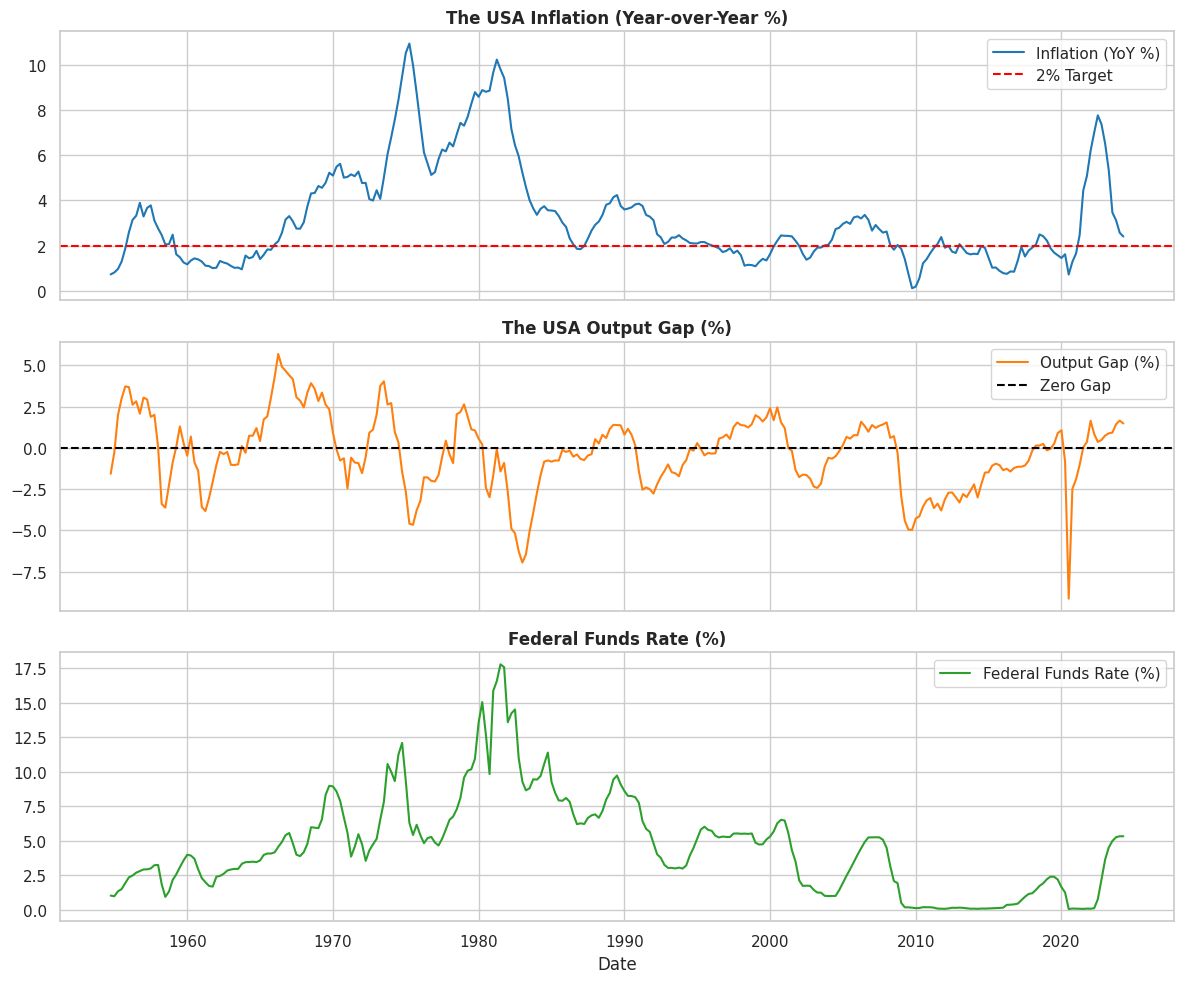

In [ ]:
#Plotting the data series for verification
sns.set_theme(style='whitegrid')
fig, axes = plt.subplots(3, 1, figsize=(12, 10), sharex=True)

#Inflation plot
axes[0].plot(historical.index, historical['inflation'], label='Inflation (YoY %)', color='tab:blue')
axes[0].axhline(2, color='red', linestyle='--', label='2% Target')
axes[0].set_title('The USA Inflation (Year-over-Year %)', fontweight = "bold")
axes[0].legend()

#Output Gap plot
axes[1].plot(historical.index, historical['output_gap'], label='Output Gap (%)', color='tab:orange')
axes[1].axhline(0, color='black', linestyle='--', label='Zero Gap')
axes[1].set_title('The USA Output Gap (%)', fontweight = "bold")
axes[1].legend()

#Bank Rate plot
axes[2].plot(historical.index, historical['bank_rate'], label='Federal Funds Rate (%)', color='tab:green')
axes[2].set_title('Federal Funds Rate (%)', fontweight = "bold")
axes[2].set_xlabel('Date')
axes[2].legend()
plt.tight_layout()
plt.show()

In [ ]:
#Creating lags for the variables
historical['L1_y'] = historical['output_gap'].shift(1)
historical['L2_y'] = historical['output_gap'].shift(2)
historical['L1_pi'] = historical['inflation'].shift(1)
historical['L2_pi'] = historical['inflation'].shift(2)
historical['L1_i'] = historical['bank_rate'].shift(1)
historical['L2_i'] = historical['bank_rate'].shift(2)

#Dropping rows with NaN values created due to lag terms generated
historical = historical.dropna()

#### 4.1.2 Applying the linear model


We first fit a Autoregressive Distributed Lag (ARDL) model. This assumes a linear economic structure between $\pi_t$, $y_t$, $i_t$ and its corresponding lags, as presented in section 3.4.1. This recursive structure implies that the output gap reacts to inflation only with a lag of one period, while infation depends on the current level of the output gap and its lags. With this, changes in $\pi_t$ and $y_t$ are proportional to their predictors, without interactions or higher-order terms.

Output Gap Model Summary:
                            OLS Regression Results                            
Dep. Variable:             output_gap   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     308.0
Date:                Sun, 04 May 2025   Prob (F-statistic):           2.37e-81
Time:                        21:27:16   Log-Likelihood:                -236.14
No. Observations:                 193   AIC:                             482.3
Df Residuals:                     188   BIC:                             498.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5515     

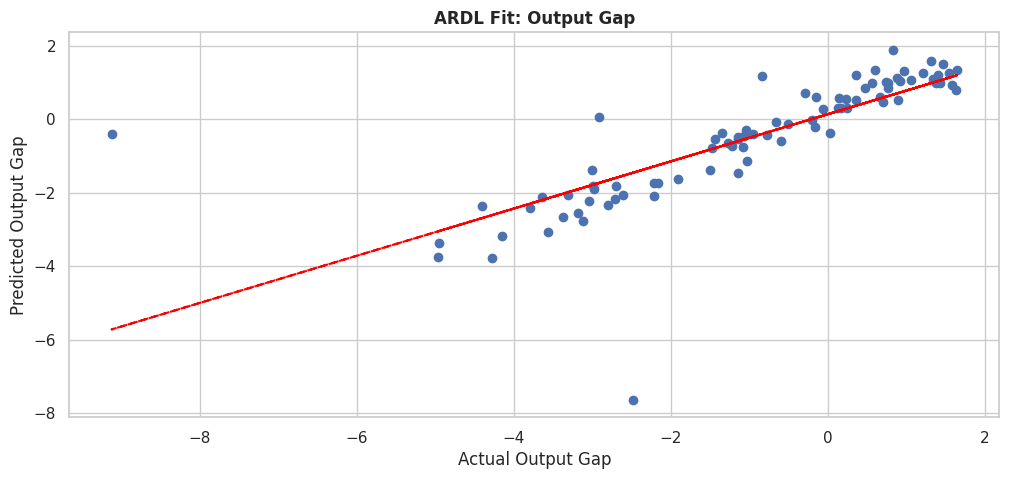

In [ ]:
#Linear Model (ARDL) Implementation for the Output Gap
split_index = int(len(historical) * 0.7)
train_data = historical.iloc[:split_index]
test_data = historical.iloc[split_index:]

#Establish dependent and independent variables, then divide between testing and training data
X_y_cols = ['L1_y', 'L1_pi', 'L1_i', 'L2_i']
y_y_col = 'output_gap'
Xy_train = train_data[X_y_cols]
yy_train = train_data[y_y_col]
Xy_test = test_data[X_y_cols]
yy_test = test_data[y_y_col]
X_y = historical[X_y_cols]
y_y = historical[y_y_col]

#OLS Model
Xy_train = sm.add_constant(Xy_train, has_constant='add')
Xy_test = sm.add_constant(Xy_test, has_constant='add')
X_y = sm.add_constant(X_y, has_constant='add')
sm_model_y = sm.OLS(yy_train, Xy_train).fit()
print("Output Gap Model Summary:")
print(sm_model_y.summary())

#Compute error
y_pred_y = sm_model_y.predict(Xy_test)
mse_y = mean_squared_error(yy_test, y_pred_y)
print(f"\nARDL (OLS) Output Gap MSE: {mse_y:.4f}")

#Plotting
fig, ax1 = plt.subplots(1, figsize=(12,5))
ax1.scatter(yy_test, y_pred_y)
ax1.set_xlabel('Actual Output Gap'); ax1.set_ylabel('Predicted Output Gap')
ax1.set_title('ARDL Fit: Output Gap', fontweight = "bold")
slope, intercept = np.polyfit(yy_test, y_pred_y, 1)
x_vals = np.array(yy_test)
y_fit = slope * x_vals + intercept
ax1.plot(x_vals, y_fit, color='red', linestyle='--', label='Best Fit Line')


Inflation Model Summary:
                            OLS Regression Results                            
Dep. Variable:              inflation   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     1437.
Date:                Sun, 04 May 2025   Prob (F-statistic):          1.35e-157
Time:                        21:27:20   Log-Likelihood:                -54.621
No. Observations:                 193   AIC:                             125.2
Df Residuals:                     185   BIC:                             151.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0534     

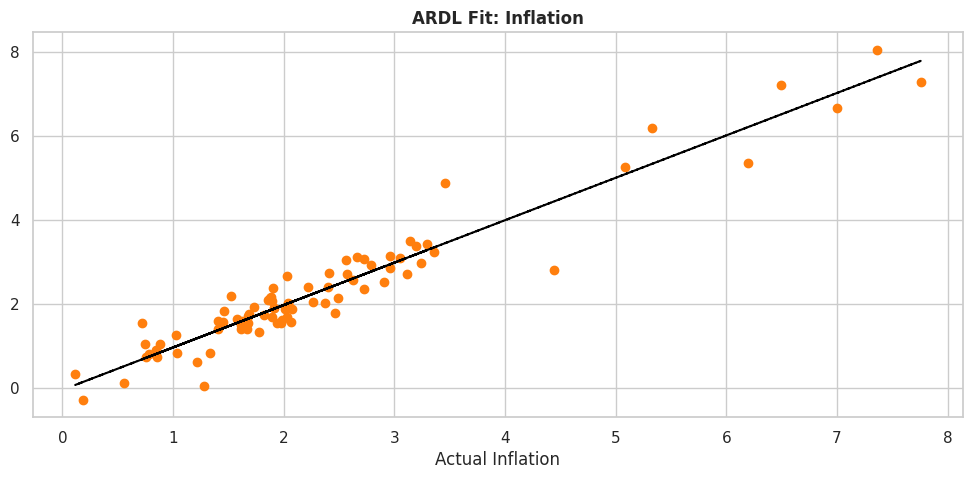

In [ ]:
#Linear Model (ARDL) Implementation
#Inflation
split_index = int(len(historical) * 0.7)
train_data = historical.iloc[:split_index]
test_data = historical.iloc[split_index:]

#Establish dependent and independent variables, then divide between testing and training data
X_pi_cols = ['output_gap', 'L1_y', 'L2_y', 'L1_pi', 'L2_pi', 'L1_i','L2_i']
y_pi_col = 'inflation'
Xpi_train = train_data[X_pi_cols]
ypi_train = train_data[y_pi_col]
Xpi_test = test_data[X_pi_cols]
ypi_test = test_data[y_pi_col]
X_pi = historical[X_pi_cols]
y_pi = historical[y_pi_col]


#OLS Model
Xpi_train = sm.add_constant(Xpi_train, has_constant='add')
Xpi_test = sm.add_constant(Xpi_test, has_constant='add')
X_pi = sm.add_constant(X_pi, has_constant='add')
sm_model_pi = sm.OLS(ypi_train, Xpi_train).fit()
print("\nInflation Model Summary:")
print(sm_model_pi.summary())

#Compute the Mean Squared Error
y_pred_pi = sm_model_pi.predict(Xpi_test)
mse_pi = mean_squared_error(ypi_test, y_pred_pi)
print(f"\nARDL (OLS) Inflation MSE: {mse_pi:.4f}")

#Plotting
fig, ax2 = plt.subplots(1, figsize=(12,5))
ax2.scatter(ypi_test, y_pred_pi, color = "tab:orange")
ax2.set_xlabel('Actual Inflation'); ax1.set_ylabel('Predicted Inflation')
ax2.set_title('ARDL Fit: Inflation', fontweight = "bold")
slope, intercept = np.polyfit(ypi_test, y_pred_pi, 1)
x_vals = np.array(ypi_test)
y_fit = slope * x_vals + intercept
ax2.plot(x_vals, y_fit, color='black', linestyle='--', label='Best Fit Line')

The plots above show the current and predicted values for the output gap and inflation. It appears that the linear model slightly overestimate the output gap. In contrast, inflation predictions are accurate when the values are low (i.e., below 4%). However, for higher inflation values, the predictions become more volatile.


#### 4.1.3 Fitting A Neural Network to the Data

To be able to capture the non-linear relationship across the variables of interest, we utilise a neural network. The model can capture complex interactions by composing them into piecewise functions, through hidden layers. Given their sensitivity to unit scale, we also apply a scaler to each variable.

Output-gap Neural Network MSE: 1.4275


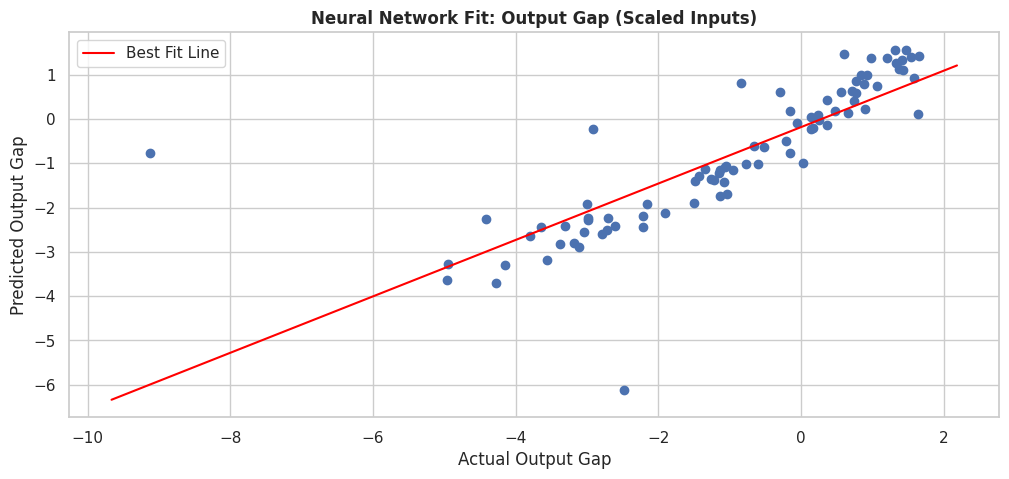

In [ ]:
# We replicate the initial setup for the OLS model for predicting the output gap
split_index = int(len(historical) * 0.7)
train_data = historical.iloc[:split_index]
test_data = historical.iloc[split_index:]
X_y_cols = ['L1_y', 'L1_pi', 'L1_i', 'L2_i']
y_y_col = 'output_gap'
Xy_train_raw = train_data[X_y_cols]
yy_train = train_data[y_y_col]
Xy_test_raw = test_data[X_y_cols]
yy_test = test_data[y_y_col]
Xy = historical[X_y_cols]
yy = historical[y_y_col]

# To avoid the different order of magnitude across the variables, we apply a scaler
scaler_y = StandardScaler()
Xy_train_scaled = scaler_y.fit_transform(Xy_train_raw)
Xy_test_scaled = scaler_y.transform(Xy_test_raw)

# Initialising Regressor
mlp_y = MLPRegressor(
    hidden_layer_sizes=(125, 62),
    activation='relu',
    solver='adam',
    learning_rate_init=0.001,
    max_iter=2000,
    random_state=455,
    early_stopping=True,
    n_iter_no_change=20
)

# We train the model and then testing on leftover sample, then the MSE is computed
mlp_y.fit(Xy_train_scaled, yy_train)
y_y_pred = mlp_y.predict(Xy_test_scaled)
mse_y_ann = mean_squared_error(yy_test, y_y_pred)
print(f"Output-gap Neural Network MSE: {mse_y_ann:.4f}")

# Plotting
fig, ax1 = plt.subplots(1, figsize=(12,5))
ax1.scatter(yy_test, y_y_pred)
ax1.set_xlabel('Actual Output Gap'); ax1.set_ylabel('Predicted Output Gap')
ax1.set_title('Neural Network Fit: Output Gap (Scaled Inputs)', fontweight = "bold")
lims = [ min(ax1.get_xlim()[0], ax1.get_ylim()[0]), max(ax1.get_xlim()[1], ax1.get_ylim()[1]) ]
slope, intercept = np.polyfit(yy_test, y_y_pred, 1)
x_vals = np.array(lims)
y_fit = slope * x_vals + intercept
ax1.plot(x_vals, y_fit, color='red', label='Best Fit Line')
ax1.legend()
ax1.grid(True)
plt.show()

Inflation Neural Network MSE: 0.3754


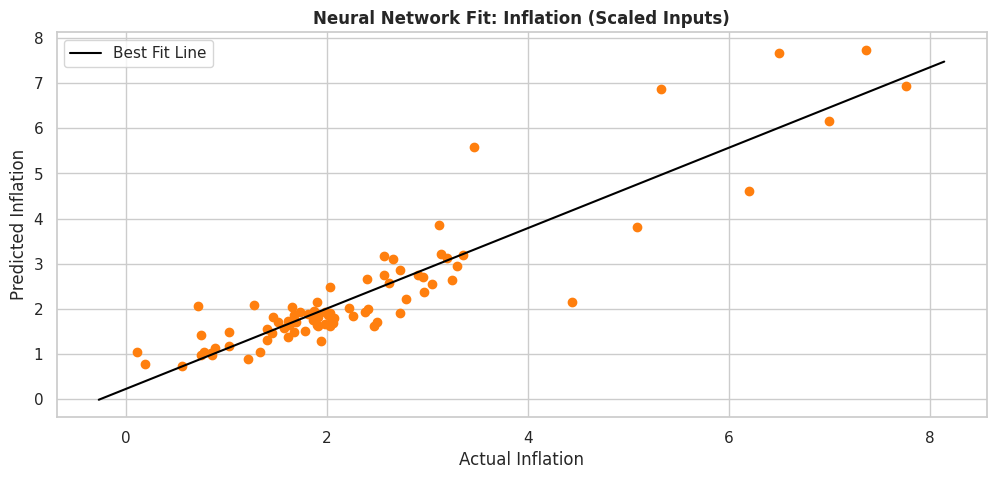

In [ ]:
# We replicate the previous setup for predicting the inflation rate too
X_pi_cols = ['output_gap', 'L1_y', 'L2_y', 'L1_pi', 'L2_pi', 'L1_i','L2_i']
y_pi_col = 'inflation'
Xpi_train_raw = train_data[X_pi_cols]
ypi_train = train_data[y_pi_col]
Xpi_test_raw = test_data[X_pi_cols]
ypi_test = test_data[y_pi_col]
Xpi = historical[X_pi_cols]
ypi = historical[y_pi_col]
scaler_pi = StandardScaler()
Xpi_train_scaled = scaler_pi.fit_transform(Xpi_train_raw)
Xpi_test_scaled = scaler_pi.transform(Xpi_test_raw)

# Initialising Regressor
mlp_pi = MLPRegressor(
    hidden_layer_sizes=(130, 65),
    activation='relu',
    solver='adam',
    learning_rate_init=0.001,
    max_iter=2000,
    random_state=455,
    early_stopping=True,
    n_iter_no_change=20
)

# We train the model and then testing on leftover sample, then the MSE is computed
mlp_pi.fit(Xpi_train_scaled, ypi_train) #Training on scaled data
y_pi_pred = mlp_pi.predict(Xpi_test_scaled) #Predicting on scaled data
mse_pi_ann = mean_squared_error(ypi_test, y_pi_pred)
print(f"Inflation Neural Network MSE: {mse_pi_ann:.4f}")

# Plotting
fig, ax2 = plt.subplots(1, figsize=(12,5))
ax2.scatter(ypi_test, y_pi_pred, color = "tab:orange")
ax2.set_xlabel('Actual Inflation'); ax2.set_ylabel('Predicted Inflation')
ax2.set_title('Neural Network Fit: Inflation (Scaled Inputs)', fontweight = "bold")
lims = [ min(ax2.get_xlim()[0], ax2.get_ylim()[0]), max(ax2.get_xlim()[1], ax2.get_ylim()[1]) ]
slope, intercept = np.polyfit(ypi_test, y_pi_pred, 1)
x_vals = np.array(lims)
y_fit = slope * x_vals + intercept
ax2.plot(x_vals, y_fit, color='black', label='Best Fit Line')
ax2.legend()
ax2.grid(True,)
plt.show()

#### 4.1.4 Comparison between the models.

In [ ]:
mse_svar_total = 0.5*(mse_y + mse_pi) #Computing average MSE of OLS models
mse_ann_total  = 0.5*(mse_y_ann + mse_pi_ann) #Computing average MSE of ANN models
improvement   = (mse_svar_total - mse_ann_total) / mse_svar_total * 100
print(f"ANN reduces total MSE by {improvement:.2f}% compared to SVAR")

ANN reduces total MSE by 10.62% compared to SVAR



ANN reduces total MSE by 10.62% compared to the OLS benchmark. This highlights its advantage in modeling complex relationships, particularly for the output gap.  This is due its ability to handle non-linear monetary policy effects and interactions across variables. While this sacrifices overall intepretability, this would be handled through a DQN agent nonetheless.

In [ ]:
#Refitting the Neural Network on entire dataset to use it in the future
ann_model_y = mlp_y.fit(Xy, yy)
ann_model_pi = mlp_pi.fit(Xpi, ypi)

### 4.2 Defining the environment

Note: this code is based on previous work from Ballesteros, et al., (2025): https://github.com/Sebastian-Ballesteros/ST449_Project

In [ ]:
#Subsetting historical data to create a dataframe for the environement
environment = historical[["inflation", "output_gap", "bank_rate"]]
environment

,inflation,output_gap,bank_rate
observation_date,,,
1955-03-31,0.967218,1.983082,1.343333
1955-06-30,1.290941,2.980351,1.500000
1955-09-30,1.863857,3.720764,1.940000
1955-12-31,2.593491,3.673726,2.356667
1956-03-31,3.137112,2.610879,2.483333
...,...,...,...
2023-03-31,5.326662,0.878919,4.516667
2023-06-30,3.459582,0.923766,4.990000
2023-09-30,3.116994,1.430080,5.260000


In [ ]:
#Defining the environment class
class EconomyEnv(gym.Env):
    """
    Custom Gymnasium Environment for simulating Central Bank Monetary Policy.
    Uses pre-trained ANN models for inflation and output gap dynamics.
    Assumes models were trained with a 2-period lag structure.
    """
    #Setting dictionary to save meta data
    metadata = {"render_modes": [], "render_fps": 1}

    def __init__(
        self,
        model_y,
        model_pi,
        historical_df,
        lookback_periods=2,
        inflation_target=2.0,
        output_gap_target=0.0,
        max_steps=50,
        mode='discrete',
        min_i=0,
        max_i=20,
        inflation_noise_std=0.0,
        output_gap_noise_std=0.0,):
        super().__init__()

        self.model_y = ann_model_y
        self.model_pi = ann_model_pi
        self.inflation_noise_std = inflation_noise_std
        self.output_gap_noise_std = output_gap_noise_std

        required_cols = ['inflation', 'output_gap', 'bank_rate'] #Selecting columns that must be present for the environment to run

        if not all(col in historical_df.columns for col in required_cols):
             raise ValueError(f"historical_df must contain columns: {required_cols}")
        self.historical_df = historical_df[required_cols].dropna().reset_index(drop=True).copy()

        #Setting environment parameters
        self.lookback_periods = lookback_periods
        self.inflation_target = inflation_target
        self.output_gap_target = output_gap_target
        self.max_steps = max_steps
        self.mode = mode

        if self.lookback_periods != 2:
            raise ValueError("This env requires lookback_periods=2 for the OLS models.")

        self.infl_col = 'inflation'
        self.gap_col  = 'output_gap'
        self.rate_col = 'bank_rate'
        self.state_variable_cols = [self.infl_col, self.gap_col, self.rate_col]

        if self.mode == 'discrete':
            self.values = np.linspace(min_i, max_i, num=41)
            self.action_space = gym.spaces.Discrete(len(self.values))
        else: raise ValueError("DQN requires mode='discrete'.")

        obs_space_size = len(self.state_variable_cols) * self.lookback_periods
        self.observation_space = gym.spaces.Box(
            low=-np.inf, high= np.inf, shape=(obs_space_size,), dtype= np.float32
            )

        self.df = None
        self.current_idx = 0
        self.episode_step = 0

    #Defining function to reset the environment
    def reset(self, seed=None, options=None):
        super().reset(seed=seed)
        max_start_index = len(self.historical_df) - self.lookback_periods
        if max_start_index < 0: raise ValueError(f"Not enough historical data.")
        start_idx = self.np_random.integers(0, max_start_index + 1)
        self.df = self.historical_df.iloc[start_idx : start_idx + self.lookback_periods].reset_index(drop=True).copy()
        self.current_idx = self.lookback_periods - 1
        self.episode_step = 0
        obs = self._get_state()
        info = self._get_info()
        return obs, info

    #Defining function to take an action in the environment
    def step(self, action):
        self.episode_step += 1

        if isinstance(self.action_space, gym.spaces.Discrete):
            if not (0 <= action < len(self.values)): raise ValueError(f"Invalid action: {action}.")
            interest_rate = float(self.values[action])
        else: raise TypeError("Unsupported action space")

        start_row_idx = self.current_idx - self.lookback_periods + 1
        end_row_idx = self.current_idx + 1
        current_rows = self.df.iloc[start_row_idx : end_row_idx]
        if len(current_rows) != self.lookback_periods: raise ValueError(f"Step error: row mismatch")

        infl_t2, gap_t2, rate_t2 = current_rows.iloc[0][self.infl_col], current_rows.iloc[0][self.gap_col], current_rows.iloc[0][self.rate_col]
        infl_t1, gap_t1, rate_t1 = current_rows.iloc[1][self.infl_col], current_rows.iloc[1][self.gap_col], current_rows.iloc[1][self.rate_col]

        #Output Gap
        features_y_dict = {'L1_y': [gap_t1],'L1_pi': [infl_t1],'L1_i': [rate_t1],'L2_i': [rate_t2]}
        features_y = pd.DataFrame(features_y_dict)
        features_y_dict = {'L1_y': [gap_t1],'L1_pi': [infl_t1],'L1_i': [rate_t1],'L2_i': [rate_t2]}
        features_y = pd.DataFrame(features_y_dict)
        try:
            deterministic_next_gap = float(self.model_y.predict(features_y)[0])
        except Exception as e:
            print(f"Error predicting output gap with features:\n{features_y}")
            raise e
        gap_noise = 0.0
        if self.output_gap_noise_std > 0:
            gap_noise = self.np_random.normal(loc=0.0, scale=self.output_gap_noise_std) #Adding random noise to replicate a realistic economy
        next_gap = deterministic_next_gap + gap_noise

        #Inflation
        features_pi_dict = {'output_gap': [next_gap],'L1_y': [gap_t1],'L2_y': [gap_t2], 'L1_pi': [infl_t1],'L2_pi': [infl_t2],'L1_i': [rate_t1],'L2_i': [rate_t2]}
        features_pi = pd.DataFrame(features_pi_dict)
        try:
            deterministic_next_infl = float(self.model_pi.predict(features_pi)[0])
        except Exception as e:
            print(f"Error predicting inflation with features:\n{features_pi}")
            raise e
        infl_noise = 0.0
        if self.inflation_noise_std > 0:
            infl_noise = self.np_random.normal(loc=0.0, scale=self.inflation_noise_std) #Adding random noise to replicate a realistic economy
        next_infl = deterministic_next_infl + infl_noise

        #Setting the equation to compute reward. More weightage is given to price stability than to output gap
        reward = -(0.75 * (next_infl - self.inflation_target)**2 + 0.25* (next_gap - self.output_gap_target)**2)

        new_row = {self.infl_col: next_infl, self.gap_col: next_gap, self.rate_col: interest_rate}
        self.df = pd.concat([self.df, pd.DataFrame([new_row])], ignore_index=True)
        self.current_idx += 1

        terminated = self.episode_step >= self.max_steps
        truncated = False
        next_obs = self._get_state()
        info = self._get_info()
        return next_obs, reward, terminated, truncated, info

    #Defining function to get state values and lookback periods
    def _get_state(self):
        if self.df is None or len(self.df) < self.lookback_periods:
             return np.zeros(self.observation_space.shape, dtype=self.observation_space.dtype)

        start_row_idx = self.current_idx - self.lookback_periods + 1
        end_row_idx = self.current_idx + 1
        rows = self.df.iloc[start_row_idx : end_row_idx]

        if len(rows) != self.lookback_periods:
            raise ValueError(f"_get_state error: Rows={len(rows)}, Idx={self.current_idx}, df len={len(self.df)}")

        state_array = rows[self.state_variable_cols].to_numpy().flatten()

        return state_array.astype(self.observation_space.dtype)

    #Defining function to get information about the current step
    def _get_info(self):
        current_vals = self.df.iloc[self.current_idx][self.state_variable_cols].to_dict()
        info = {"current_step": self.episode_step}
        info.update(current_vals)
        return info

    def render(self): pass
    def close(self): pass

#### 4.2.1 Testing the Environment

In [ ]:
#Setting environmentvalues
env = EconomyEnv(
    historical_df=environment,
    model_y= ann_model_y,
    model_pi= ann_model_pi,
    lookback_periods=2,
    inflation_target=2,
    output_gap_target=0.0,
    max_steps=50, #50 steps per episode
    mode="discrete",
    min_i=0,
    max_i=20
)

#Test Reset
obs, info = env.reset()
print("Initial internal dataframe (first 2 rows):")
print(env.df.head())
assert obs.shape == env.observation_space.shape, "Observation shape mismatch"
assert len(env.df) == env.lookback_periods, "Initial df length mismatch"

#Test Step
action = env.action_space.sample() #Taking a random but valid action
print(f"Action taken (index): {action}, Corresponding rate: {env.values[action]:.2f}")
next_obs, reward, terminated, truncated, info = env.step(action)

print("Next Observation:", next_obs)
print(f"Reward: {reward:.4f}")
print("Internal dataframe after step (last few rows):")
print(env.df.tail()) #Showing the newly predicted row

assert next_obs.shape == env.observation_space.shape, "Next observation shape mismatch"
assert len(env.df) == env.lookback_periods + 1, "df length after step mismatch"
assert info['current_step'] == 1, "Step count mismatch"

Initial internal dataframe (first 2 rows):
   inflation  output_gap  bank_rate
0    2.22370   -0.148633   2.220000
1    1.88229   -0.055726   2.403333
Action taken (index): 17, Corresponding rate: 8.50
Next Observation: [ 1.8822902  -0.05572578  2.4033334   1.9605445  -0.08629809  8.5       ]
Reward: -0.0030
Internal dataframe after step (last few rows):
   inflation  output_gap  bank_rate
0   2.223700   -0.148633   2.220000
1   1.882290   -0.055726   2.403333
2   1.960544   -0.086298   8.500000


### 4.3 Deep Q-Network (DQN)

#### 4.3.1 DQN components

In [ ]:
#Defining the transition tuple
Transition = namedtuple('Transition', ('state', 'action', 'next_state', 'reward', 'done'))

#Replay buffer
class ReplayBuffer:
    def __init__(self, capacity): self.memory = deque([], maxlen=capacity)
    def push(self, *args): self.memory.append(Transition(*args))
    def sample(self, batch_size):
        actual_batch_size = min(len(self.memory), batch_size)
        if actual_batch_size == 0: return []
        return random.sample(self.memory, actual_batch_size)
    def __len__(self): return len(self.memory)

#Setting up the Q network
class QNetwork(nn.Module):
    def __init__(self, n_observations, n_actions, hidden_dim=128):
        super(QNetwork, self).__init__()
        self.layer1 = nn.Linear(n_observations, hidden_dim)
        self.layer2 = nn.Linear(hidden_dim, hidden_dim)
        self.layer3 = nn.Linear(hidden_dim, n_actions)
    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        return self.layer3(x)

#### 4.3.2 DQN Agent

In [ ]:
#Setting up the DQN Agent
class DQNAgent:
    def __init__(self, env, state_mean, state_std, buffer_capacity, batch_size, gamma,
                 eps_start, eps_end, eps_decay_steps, learning_rate, target_update_freq, hidden_dim):
        self.env = env
        self.state_dim = env.observation_space.shape[0]
        self.action_dim = env.action_space.n
        self.buffer = ReplayBuffer(buffer_capacity)
        self.batch_size = batch_size
        self.gamma = gamma #Discount factor
        self.eps_start = eps_start #Initial epsilon for the e-greedy policy
        self.eps_end = eps_end #Final epsilon for the e-greedy policy
        self.eps_decay_steps = eps_decay_steps
        self.target_update_freq = target_update_freq #Values update after x episodes
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu") #Defining pytorch setup

        self.state_mean = torch.tensor(state_mean, dtype=torch.float32, device=self.device) #Normalised statistics using tensor flow
        self.state_std = torch.tensor(state_std, dtype=torch.float32, device=self.device) #Normalised statistics using tensor flow

        self.policy_net = QNetwork(self.state_dim, self.action_dim, hidden_dim).to(self.device) #Initialising Q network
        self.target_net = QNetwork(self.state_dim, self.action_dim, hidden_dim).to(self.device)
        self.target_net.load_state_dict(self.policy_net.state_dict())
        self.target_net.eval()
        self.optimizer = optim.AdamW(self.policy_net.parameters(), lr=learning_rate, amsgrad=True)
        self.loss_fn = nn.SmoothL1Loss()
        self.steps_done = 0

    #Defining function for selecting an action
    def select_action(self, state):
        sample = random.random()
        epsilon = self.eps_end + (self.eps_start - self.eps_end) * math.exp(-1. * self.steps_done / self.eps_decay_steps)
        self.steps_done += 1
        if sample > epsilon: # Exploit
            with torch.no_grad():
                state_tensor = torch.tensor(state, dtype=torch.float32, device=self.device)
                normalized_state = (state_tensor - self.state_mean) / self.state_std
                action = self.policy_net(normalized_state.unsqueeze(0)).max(1)[1].view(1, 1)
                return action.item()
        else: # Explore
            return self.env.action_space.sample()

    #Defining transition buffer
    def store_transition(self, state, action, next_state, reward, done):
        self.buffer.push(state, action, next_state, reward, done)

    #Defining function to update the model
    def update_model(self):
        if len(self.buffer) < self.batch_size: return None
        transitions = self.buffer.sample(self.batch_size)

        if not transitions: return None
        batch = Transition(*zip(*transitions))
        state_batch = torch.tensor(np.array(batch.state), dtype=torch.float32, device=self.device)
        action_batch = torch.tensor(batch.action, dtype=torch.long, device=self.device).unsqueeze(1)
        next_state_batch = torch.tensor(np.array(batch.next_state), dtype=torch.float32, device=self.device)
        reward_batch = torch.tensor(batch.reward, dtype=torch.float32, device=self.device).unsqueeze(1)
        done_batch = torch.tensor(batch.done, dtype=torch.bool, device=self.device)
        normalized_state_batch = (state_batch - self.state_mean) / self.state_std
        normalized_next_state_batch = (next_state_batch - self.state_mean) / self.state_std
        state_action_values = self.policy_net(normalized_state_batch).gather(1, action_batch)

        with torch.no_grad():
            next_state_q_values = self.target_net(normalized_next_state_batch)
            max_next_state_values = next_state_q_values.max(1)[0]
        next_state_values_masked = max_next_state_values * (~done_batch)
        expected_state_action_values = reward_batch + (next_state_values_masked.unsqueeze(1) * self.gamma)
        loss = self.loss_fn(state_action_values, expected_state_action_values)

        if torch.isnan(loss): print("!!! WARNING: Loss is NaN!"); return None
        self.optimizer.zero_grad()
        loss.backward()
        torch.nn.utils.clip_grad_value_(self.policy_net.parameters(), 100)
        self.optimizer.step()

        return loss.item()

    #Defining function to update state values
    def update_target_network(self):
        self.target_net.load_state_dict(self.policy_net.state_dict())


#### 4.3.3 Training the model


In [ ]:
if 'ann_model_y' not in locals() or not hasattr(ann_model_y, 'predict'): raise NameError("Fitted model 'ann_model_y' not found.")
if 'ann_model_pi' not in locals() or not hasattr(ann_model_pi, 'predict'): raise NameError("Fitted model 'ann_model_pi' not found.")

# Hyperparameters for EconomyEnv
N_EPISODES = 3000  #Number of episodes
BUFFER_CAPACITY = 100000
BATCH_SIZE = 256
GAMMA = 0.9784721948075213 #Discount factor
MAX_STEPS_PER_EPISODE = 75 #Number of steps per episodes
total_expected_steps = N_EPISODES * MAX_STEPS_PER_EPISODE #Total number of steps
EPS_START = 1.0 #Initial epsilon for e-greedy policy
EPS_END = 0.1 #Final epsilon for e-greedy policy
EPS_DECAY_STEPS = int(total_expected_steps * 0.65)
LEARNING_RATE = 0.00016738085788752134
TARGET_UPDATE_FREQ = 10
HIDDEN_DIM = 256 #Network dimension
TRAIN_START_MIN_BUFFER = 2000

#Initialising the environment
env = EconomyEnv(
    historical_df=environment, #Using environment data
    model_y= ann_model_y, #Using ann model for output gap
    model_pi= ann_model_pi, #Using ann model for inflation
    max_steps=MAX_STEPS_PER_EPISODE
)

#Calculating state normalisation stats
temp_env_for_norm = EconomyEnv( historical_df=environment, model_y=ann_model_y, model_pi=ann_model_pi)
num_samples_for_norm = 10000
sampled_states = []


for i in range(num_samples_for_norm):
    obs, _ = temp_env_for_norm.reset(seed=i)
    sampled_states.append(obs)
sampled_states = np.array(sampled_states)
state_mean = np.mean(sampled_states, axis=0)
state_std = np.std(sampled_states, axis=0)
state_std[state_std < 1e-6] = 1.0 #Preventing division by 0
temp_env_for_norm.close()

#Initialising the agent
agent = DQNAgent( env=env, state_mean=state_mean, state_std=state_std,
    buffer_capacity=BUFFER_CAPACITY, batch_size=BATCH_SIZE, gamma=GAMMA,
    eps_start=EPS_START, eps_end=EPS_END, eps_decay_steps=EPS_DECAY_STEPS,
    learning_rate=LEARNING_RATE, target_update_freq=TARGET_UPDATE_FREQ, hidden_dim=HIDDEN_DIM )

#Setting up the training loop
episode_rewards = [] #Empty list to save episode rewards
episode_losses = [] #Empty list to save losses
training_start_time = time.time()
log_interval = 50

for i_episode in range(N_EPISODES):
    state, info = env.reset(seed=i_episode) #Setting seed for variety in this case
    episode_reward = 0
    episode_loss_sum = 0.0
    steps_in_episode = 0
    num_updates = 0
    terminated = False
    truncated = False

    while not terminated and not truncated:
        action_idx = agent.select_action(state)
        observation, reward, terminated, truncated, info = env.step(action_idx)
        done = terminated or truncated #Using combined flag for buffer

        episode_reward += reward
        agent.store_transition(state, action_idx, observation, reward, done)
        state = observation

        if len(agent.buffer) >= TRAIN_START_MIN_BUFFER:
             loss = agent.update_model()
             if loss is not None:
                 episode_loss_sum += loss
                 num_updates += 1

        steps_in_episode += 1

    episode_rewards.append(episode_reward) #Saving the reward per episode
    avg_loss = episode_loss_sum / num_updates if num_updates > 0 else 0 #Computing the average loss
    episode_losses.append(avg_loss) #Saving the average loss

    if (i_episode + 1) % agent.target_update_freq == 0:
        agent.update_target_network() #Updating target network

    if (i_episode + 1) % log_interval == 0:
        avg_reward = np.mean(episode_rewards[-log_interval:]) #Computing th average reward
        current_epsilon = agent.eps_end + (agent.eps_start - agent.eps_end) * \
                          math.exp(-1. * agent.steps_done / agent.eps_decay_steps) #Updating epsilon value

        print(f"Episode: {i_episode+1}/{N_EPISODES}, Steps: {steps_in_episode}, Total Steps: {agent.steps_done}, "
              f"Avg Reward (last {log_interval}): {avg_reward:.2f}, Avg Loss: {avg_loss:.5f}, Epsilon: {current_epsilon:.3f}")

training_end_time = time.time() #Computing the time taken to train the agent
env.close() #Closing the environment

Episode: 50/3000, Steps: 75, Total Steps: 3750, Avg Reward (last 50): -624.90, Avg Loss: 0.41370, Epsilon: 0.977
Episode: 100/3000, Steps: 75, Total Steps: 7500, Avg Reward (last 50): -606.87, Avg Loss: 0.69663, Epsilon: 0.955
Episode: 150/3000, Steps: 75, Total Steps: 11250, Avg Reward (last 50): -612.21, Avg Loss: 0.78484, Epsilon: 0.933
Episode: 200/3000, Steps: 75, Total Steps: 15000, Avg Reward (last 50): -617.04, Avg Loss: 0.77007, Epsilon: 0.912
Episode: 250/3000, Steps: 75, Total Steps: 18750, Avg Reward (last 50): -597.10, Avg Loss: 0.68151, Epsilon: 0.892
Episode: 300/3000, Steps: 75, Total Steps: 22500, Avg Reward (last 50): -567.97, Avg Loss: 0.62096, Epsilon: 0.872
Episode: 350/3000, Steps: 75, Total Steps: 26250, Avg Reward (last 50): -587.33, Avg Loss: 0.66060, Epsilon: 0.852
Episode: 400/3000, Steps: 75, Total Steps: 30000, Avg Reward (last 50): -614.47, Avg Loss: 0.62358, Epsilon: 0.833
Episode: 450/3000, Steps: 75, Total Steps: 33750, Avg Reward (last 50): -561.56, Av

#### 4.34 Evaluating and Plotting Agent Performance

In [ ]:
#Evaluating agent performance
eval_rewards = []
agent.steps_done = float('inf') # Force greedy actions

num_eval_episodes = 50
for episode in range(num_eval_episodes):
    state, info = env.reset(seed=N_EPISODES + episode)
    total_reward = 0
    terminated = False
    truncated = False
    eval_steps = 0
    while not terminated and not truncated:
        action = agent.select_action(state) # Greedy
        next_state, reward, terminated, truncated, info = env.step(action)
        state = next_state
        total_reward += reward
        eval_steps += 1
    eval_rewards.append(total_reward)

# Loading Policy Network and Normalisation Statistics From The Trained Agent for Evaluation
device = agent.device
eval_state_mean = agent.state_mean
eval_state_std = agent.state_std
eval_policy_net = agent.policy_net
eval_policy_net.eval()

In [ ]:
#Plotting the DQN agent performance
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.set_ylim(-700, 0)
color = 'tab:blue'
ax1.set_xlabel('Episode')
ax1.set_ylabel('Total Reward per Episode')
ax1.plot(episode_rewards, label='Episode Reward', color='lightgrey', linewidth=0.8, alpha=0.7)
window = 50
if len(episode_rewards) >= window:
    smoothed_rewards = np.convolve(episode_rewards, np.ones(window)/window, mode='valid')
    plot_indices_rew = np.arange(window - 1, len(episode_rewards))
    ax1.plot(plot_indices_rew, smoothed_rewards, label=f'Moving Avg Reward (w={window})', color=color, linewidth=1.5)
ax1.tick_params(axis='y', labelcolor=color)

ax1.legend(loc='lower left')
ax1.grid(True, alpha=0.3)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Average Loss per Episode')
if len(episode_losses) >= window:
    smoothed_losses = np.convolve(episode_losses, np.ones(window)/window, mode='valid')
    plot_indices_loss = np.arange(window - 1, len(episode_losses))
    ax2.plot(plot_indices_loss, smoothed_losses, label=f'Moving Avg Loss (w={window})', color=color, linewidth=1.0, alpha=0.8)
else:
    ax2.plot(episode_losses, label='Avg Episode Loss', color=color, linewidth=1.0, alpha=0.6)

ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

plt.title('Training Rewards and Loss - DQN Agent', fontweight = "bold")
fig.tight_layout()
plt.show()

#### 4.35 Defining DQN Agent's Greedy Policy Function

In [ ]:
def get_dqn_greedy_action(state):
    """Takes raw state, normalizes using agent's stats, returns greedy action index."""
    with torch.no_grad():
        state_tensor = torch.tensor(state, dtype=torch.float32, device=device)
        normalized_state = (state_tensor - eval_state_mean) / eval_state_std # Use agent's stats
        action = eval_policy_net(normalized_state.unsqueeze(0)).max(1)[1].view(1, 1) # Use agent's net
        return action.item()

### 4.4 Implementing a basic Taylor Rule Policy Simulation for Comparison

A Taylor‐type rule is the most common simple benchmark in monetary‐policy studies. In its standard form, originally proposed by economist John B. Taylor in 1993 [1], it says the nominal bank rate (or federal funds rate target in the U.S. context) should respond systematically to deviations of current inflation from its target and of output from its potential level (i.e., the output gap). It provides a straightforward, quantitative guideline for setting the policy rate, serving as both a normative suggestion for how policy might be conducted and a positive benchmark for evaluating how it has been conducted.

The rule is typically expressed in the following form:

$$i_t = r^* + \pi_t + \alpha(\pi_t - \pi^*) + \beta y_t$$

The parameters $\alpha$ and $\beta$ dictate the strength of the policy response to the inflation and output gaps, respectively. A crucial element is the Taylor Principle, which posits that the response to the inflation gap, $\alpha$, should be positive ($\alpha$> 0). This ensures that if inflation increases by one percentage point, the nominal interest rate ($i_t$) increases by more than one percentage point (specifically, by $1+\alpha$ percentage points, according to the formula above). This raises the real interest rate ($i_t - \pi_t$), which is necessary to dampen inflationary pressures (Taylor, 1993; Clarida et. al, 2000).

In [ ]:
INFLATION_TARGET = 2.0 #Setting parameters for Taylor Rule
EQUILIBRIUM_REAL_RATE = 2.0 #Based on literature
TAYLOR_ALPHA = 1.5
TAYLOR_BETA = 0.5

print(f" - Taylor Rule Parameters: target={INFLATION_TARGET}, r*={EQUILIBRIUM_REAL_RATE}, alpha={TAYLOR_ALPHA}, beta={TAYLOR_BETA}")

def calculate_taylor_rate(inflation, output_gap):
    rate = inflation + EQUILIBRIUM_REAL_RATE + TAYLOR_ALPHA * (inflation - INFLATION_TARGET) + TAYLOR_BETA * output_gap
    return rate

#Getting action values from the temporary environment
try:
    _temp_env = EconomyEnv(ann_model_y, ann_model_pi, environment.head())
    ACTION_VALUES = _temp_env.values
    MIN_RATE = ACTION_VALUES[0]; MAX_RATE = ACTION_VALUES[-1]
    _temp_env.close()
except Exception as e: raise RuntimeError(f"Error creating temp environment for action values: {e}")

#Defining function for taking action for Taylor rule simulation
def get_taylor_action(state):
    """ Gets the discrete action index for the Taylor Rule."""
    current_inflation = state[3]
    current_output_gap = state[4]
    taylor_rate = calculate_taylor_rate(current_inflation, current_output_gap)
    clipped_rate = np.clip(taylor_rate, MIN_RATE, MAX_RATE)
    closest_action_index = np.argmin(np.abs(ACTION_VALUES - clipped_rate))
    return closest_action_index

## 5 EVALUATION

### 5.1 Running Simulations for DQN Agent and Taylor Rule

To test the performance of the Deep Q-Network model against a benchmark, we use the Taylor Rule. Within a simulated economic environment, we manage any given policy episode-by-episode and then execute it step-by-step, using 2000 separate evaluation episodes. The accumulated rewards and the detailed trajectory data from each run are stored (dqn_results for DQN, taylor_results for Taylor Rule), providing the necessary data for a comparative analysis of the two approaches. Finally, the evaluation environment resources are released.



In [ ]:
#Instantiating evaluating environment
eval_env = EconomyEnv(
    historical_df=environment,
    model_y= ann_model_y,
    model_pi= ann_model_pi,
    max_steps=50
)


#Defining episode run function
def run_episode(env, policy_func, start_seed):
    """Runs one episode using the given policy function and returns results."""
    state, info = env.reset(seed=start_seed)
    episode_reward = 0
    terminated, truncated = False, False
    trajectory = { 'state': [state], 'action': [], 'reward': [],
                   'inflation': [info.get('inflation', np.nan)],
                   'output_gap': [info.get('output_gap', np.nan)],
                   'bank_rate': [info.get('bank_rate', np.nan)] }
    action_values_taken = []
    while not terminated and not truncated:
        action_idx = policy_func(state)
        action_values_taken.append(env.values[action_idx])
        observation, reward, terminated, truncated, info = env.step(action_idx)
        trajectory['state'].append(observation)
        trajectory['action'].append(action_idx)
        trajectory['reward'].append(reward)
        trajectory['inflation'].append(info.get('inflation', np.nan))
        trajectory['output_gap'].append(info.get('output_gap', np.nan))
        trajectory['bank_rate'].append(info.get('bank_rate', np.nan))
        state = observation
        episode_reward += reward
    trajectory['action_values'] = action_values_taken
    return episode_reward, trajectory

#Running evaluation episodes
NUM_EVAL_EPISODES = 2000 #2000 episodes

eval_seeds = [2025 + i for i in range(NUM_EVAL_EPISODES)]
dqn_results = []
taylor_results = []

for i, seed in enumerate(eval_seeds):
    if (i + 1) % (NUM_EVAL_EPISODES // 5) == 0: print(f"  Running episode {i+1}/{NUM_EVAL_EPISODES}...")
    #DQN Run
    dqn_reward, dqn_traj = run_episode(eval_env, get_dqn_greedy_action, seed)
    dqn_results.append({'reward': dqn_reward, 'trajectory': dqn_traj})

    #Taylor Run
    taylor_policy_func_eval = lambda s: get_taylor_action(s)
    taylor_reward, taylor_traj = run_episode(eval_env, taylor_policy_func_eval, seed)
    taylor_results.append({'reward': taylor_reward, 'trajectory': taylor_traj})

eval_env.close()

#### 5.1.1 Plotting Trajectories

In [ ]:
#Creating DataFrames for DQN and Taylor trajectories
episode_idx_to_plot = 22
if episode_idx_to_plot < len(dqn_results):
    dqn_traj_dict = dqn_results[episode_idx_to_plot]['trajectory']
    taylor_traj_dict = taylor_results[episode_idx_to_plot]['trajectory']
    num_steps = len(dqn_traj_dict['reward'])
    steps_axis = np.arange(num_steps)
    trajectory_df = pd.DataFrame({ 'Step': steps_axis,
        'DQN_Inflation': dqn_traj_dict['inflation'][1:], 'Taylor_Inflation': taylor_traj_dict['inflation'][1:],
        'DQN_Gap': dqn_traj_dict['output_gap'][1:], 'Taylor_Gap': taylor_traj_dict['output_gap'][1:],
        'DQN_Rate': dqn_traj_dict['action_values'], 'Taylor_Rate': taylor_traj_dict['action_values'], })
else:
    print(f"Warning: Cannot plot episode index {episode_idx_to_plot}, only {len(dqn_results)} episodes were run.")
    trajectory_df = None

#Plotting the trajectory
if trajectory_df is not None:
    fig, axes = plt.subplots(3, 1, figsize=(12, 10), sharex=True)
    fig.title(f'Trajectory: DQN versus Taylor Rule', fontweight = "bold")

    #Plotting Inflation
    axes[0].plot(trajectory_df['Step'], trajectory_df['DQN_Inflation'], label='DQN Agent', color='tab:blue', marker='.', markersize=4, linestyle='-')
    axes[0].plot(trajectory_df['Step'], trajectory_df['Taylor_Inflation'], label='Taylor Rule', color='tab:orange', marker='.', markersize=4, linestyle='-')
    axes[0].axhline(INFLATION_TARGET, color='tab:green', linestyle='--', label=f'Target ({INFLATION_TARGET}%)', size = 1.5)
    axes[0].set_ylabel('Inflation (%)'); axes[0].legend(); axes[0].grid(True)

    #Plotting Output Gap
    axes[1].plot(trajectory_df['Step'], trajectory_df['DQN_Gap'], label='DQN Agent', color='tab:blue', marker='.', markersize=4, linestyle='-')
    axes[1].plot(trajectory_df['Step'], trajectory_df['Taylor_Gap'], label='Taylor Rule', color='tab:orange', marker='.', markersize=4, linestyle='-')
    axes[1].axhline(0.0, color='tab:green', linestyle='--', label='Target (0.0%)', size = 1.5)
    axes[1].set_ylabel('Output Gap (%)'); axes[1].grid(True)

    #Plotting Bank Rate
    axes[2].step(trajectory_df['Step'], trajectory_df['DQN_Rate'], where='post', label='DQN Agent Rate', color='tab:blue')
    axes[2].step(trajectory_df['Step'], trajectory_df['Taylor_Rate'], where='post', label='Taylor Rule Rate', color='tab:orange')
    axes[2].set_ylabel('Bank Rate (%)'); axes[2].set_xlabel('Simulation Quarters'); axes[2].legend(); axes[2].grid(True)
    plt.tight_layout(rect=[0, 0.03, 1, 0.96]); plt.show()

#### 5.1.2 Commentary

The plot above illustrates a simulated economic scenario over 50 quarters, comparing the responses and outcomes under two different monetary policy strategies: one determined by the trained DQN Agent and the other by a standard Taylor Rule. The simulation starts from an initial state characterized by high inflation (around 6.5-7%) and a slightly positive output gap (around 0.5%).

Top Panel (Inflation): Both policies aim to bring inflation down towards the 2% target (dashed red line). The Taylor Rule (orange line) initially reacts strongly, leading to a rapid decrease in inflation, but it slightly overshoots the target around quarter 20 before stabilizing just above 2%. The DQN Agent (blue line) also brings inflation down effectively, converging slightly faster initially and appearing to stabilize more precisely around the 2% target with less oscillation after approximately quarter 15.

Middle Panel (Output Gap): The initial positive output gap quickly turns negative under both policies as interest rates rise to combat inflation. However, the impact differs significantly. The Taylor Rule's aggressive rate hikes induce a deep recession, with the output gap plummeting to nearly -6% around quarter 10. The recovery is gradual, with the gap remaining negative for a prolonged period before slowly returning towards the 0% target. In contrast, the DQN Agent's policy results in a much milder downturn, with the output gap reaching a minimum of only about -1.5% around quarter 5. The recovery is also considerably faster, with the output gap stabilizing very close to the 0% target from around quarter 15 onwards.

Bottom Panel (Interest Rate): This panel reveals the distinct policy actions. The Taylor Rule responds to the initial high inflation and positive output gap with a sharp and substantial increase in the interest rate, peaking above 17.5% within the first few quarters. It then maintains high rates for about 10 quarters before gradually lowering them as inflation and the output gap fall. The DQN Agent, learning from its interaction with the simulated environment, adopts a much more moderate approach. It raises the interest rate initially, but only to about 2.5%, keeping it relatively stable for the first 20 quarters before making minor adjustments, generally staying below 2.5% for the remainder of the simulation.

Synthesis: The simulation highlights the DQN Agent's ability to achieve the dual mandate objectives more efficiently within this modeled environment. It successfully curbs inflation back to the target while inducing a significantly shallower recession (smaller negative output gap) compared to the Taylor Rule. The DQN achieves this with a much less aggressive and less volatile interest rate path, suggesting a potentially more stable and less disruptive approach to monetary policy compared to the reactive nature of the standard Taylor Rule in this specific simulation.

### 5.2 Policy Metrics Comparison

The following code chunk introduces a function that quantifies and compares the performance observed in simulation runs and historical data. The mean and standard deviations of inflation, output gap, and interest rates are observed, as well as the average total loss. This is then used to model the simulation result for the DQN agent and the Taylor Rule.

In [ ]:
#Defining function to calculate metrics
def calculate_metrics(results_or_df, source_type='simulation', inflation_target=2.0, gap_target=0.0):
    """
    Calculates average metrics.
    If source_type is 'simulation', results_or_df is the list of episode results.
    If source_type is 'historical', results_or_df is the historical DataFrame.
    """
    metrics = {}
    all_infl, all_gap, all_rate_values, all_rate_changes = [], [], [], []

    if source_type == 'simulation':
        rewards = [r['reward'] for r in results_or_df]
        metrics['Avg Cumulative Reward'] = np.mean(rewards)
        metrics['Std Dev Reward'] = np.std(rewards)
        for r in results_or_df:
            traj = r['trajectory']
            infl_traj = traj['inflation'][1:]
            gap_traj = traj['output_gap'][1:]
            rate_traj = traj['action_values']
            all_infl.extend(infl_traj)
            all_gap.extend(gap_traj)
            all_rate_values.extend(rate_traj)
            if len(rate_traj) > 1: all_rate_changes.extend(np.diff(rate_traj))

    elif source_type == 'historical':
        hist_df = results_or_df
        required_cols = ['inflation', 'output_gap', 'bank_rate'] #Checking the existence of required columns in dataframe
        if not all(col in hist_df.columns for col in required_cols):
            raise ValueError("Historical DataFrame missing required columns for metrics.")

        all_infl = hist_df['inflation'].dropna().tolist()
        all_gap = hist_df['output_gap'].dropna().tolist()
        all_rate_values = hist_df['bank_rate'].dropna().tolist()
        if len(all_rate_values) > 1:
            all_rate_changes = np.diff(all_rate_values).tolist()
        metrics['Avg Cumulative Reward'] = np.nan #Cumulative reward does not apply for historical data
        metrics['Std Dev Reward'] = np.nan

    else:
        raise ValueError("Invalid source_type for calculate_metrics")

    #Calculating common statistics
    if all_infl:
        metrics['Avg Inflation (%)'] = np.mean(all_infl)
        metrics['Std Dev Inflation (%)'] = np.std(all_infl)
        metrics['Avg Squared Infl Dev'] = np.mean([(inf - inflation_target)**2 for inf in all_infl])
    else:
        metrics['Avg Inflation (%)'], metrics['Std Dev Inflation (%)'], metrics['Avg Squared Infl Dev'] = np.nan, np.nan, np.nan

    if all_gap:
        metrics['Avg Output Gap (%)'] = np.mean(all_gap)
        metrics['Std Dev Output Gap (%)'] = np.std(all_gap)
        metrics['Avg Squared Gap Dev'] = np.mean([(g - gap_target)**2 for g in all_gap])
    else:
         metrics['Avg Output Gap (%)'], metrics['Std Dev Output Gap (%)'], metrics['Avg Squared Gap Dev'] = np.nan, np.nan, np.nan

    if all_rate_values:
        metrics['Avg Interest Rate (%)'] = np.mean(all_rate_values)
        metrics['Std Dev Interest Rate (%)'] = np.std(all_rate_values)
        metrics['Std Dev Rate Changes (%)'] = np.std(all_rate_changes) if all_rate_changes else 0
    else:
         metrics['Avg Interest Rate (%)'], metrics['Std Dev Interest Rate (%)'], metrics['Std Dev Rate Changes (%)'] = np.nan, np.nan, np.nan

    #Calculating overall loss if possible
    if 'Avg Squared Infl Dev' in metrics and 'Avg Squared Gap Dev' in metrics and not np.isnan(metrics['Avg Squared Infl Dev']) and not np.isnan(metrics['Avg Squared Gap Dev']):
        metrics['Avg Total Loss'] = 0.75 * metrics['Avg Squared Infl Dev'] + 0.25 * metrics['Avg Squared Gap Dev']
    else:
        metrics['Avg Total Loss'] = np.nan

    return metrics

#Calculating metrics for DQN, Taylor, and historical data
dqn_metrics = calculate_metrics(dqn_results, source_type='simulation')
taylor_metrics = calculate_metrics(taylor_results, source_type='simulation')
actual_metrics = calculate_metrics(environment, source_type='historical')

#Saving metrics to DataFrame
comparison = pd.DataFrame({
    'DQN Agent (Sim)': dqn_metrics,
    'Taylor Rule (Sim)': taylor_metrics,
    'Actual History': actual_metrics
})

print(comparison)

#### 5.2.1 Commentary

Based on the simulation results, the DQN Agent demonstrates a significantly stronger performance compared to both the standard Taylor Rule simulation and the actual historical outcomes.

he DQN Agent's simulated average total loss (0.55) is substantially lower than both the Taylor Rule's simulated loss (2.31) and the loss observed in actual history (6.22). Specifically, the DQN's loss is 76.9% lower than the Taylor Rule's simulated loss, indicating its superior ability within the model to adapt policy actions to minimize overall economic volatility compared to the fixed rule. Both simulated policies show a much lower loss than what occurred historically.

Focusing on inflation, the DQN Agent simulation again shows the best performance relative to the 2% target. Its policy resulted in an average inflation rate of 2.174%. While the Taylor Rule simulation also improved upon history with an average of 2.337%, the DQN was closer to the target by 48.37% in comparison. Compared to the actual historical average inflation of 3.26%, the DQN simulation represents a significant improvement in achieving the inflation objective.

Furthermore, the DQN Agent achieved near-perfect stabilization of the output gap in the simulation, with an average output gap of just -0.058%, extremely close to the 0.0% target. This is considerably better than the Taylor Rule simulation's average gap of -1.37% and also closer to the target than the actual historical average gap of -0.32%. This highlights the DQN's remarkable effectiveness in managing economic activity around its potential level within the simulated environment, surpassing both the simple rule and historical performance in this dimension.

## 6. LIMITATIONS

Despite the promising results of our analysis, it has several limitations. First, there's inherent model risk as the RL agent's optimal policy is derived from an environment model trained on historical data. This model might not perfectly capture future economic dynamics, especially during unprecedented events. Closely related is the Lucas Critique: the very act of implementing a new policy derived from the RL agent could alter the underlying economic relationships (the environment's transition dynamics), potentially rendering the learned policy suboptimal. Furthermore, RL models typically have significant data requirements, needing longer and additional time series macroeconomic variables to learn effectively.

Finally, the complex nature of deep RL often results in a "black box" problem, making it challenging to fully understand the economic intuition behind the agent's specific interest rate decisions, which can be a barrier to adoption by policymakers who require explainability.

The current model could be expanded by incorporating additional state variables (like fiscal policy indicators, global economic conditions, or financial stability metrics), exploring different RL algorithms beyond DQN (such as Actor-Critic methods), or moving towards continuous action spaces for interest rates rather than discrete steps, as in Hinterlang \& Tanzer (2021). However, each expansion adds complexity and potentially exacerbates the aforementioned limitations regarding data and model risk, highlighting areas for future research and development.








## 7. CONCLUSIONS

In this study, we show an application of the Deep Q-learning algorithm to determine the central bank's monetary policy. As in Hinterlang \& Tanzer (2021), we take the U.S. Federal Reserve Bank as the agent and simulate an environment by using historical data from interest rates, inflation and output gaps.

Deep Q-learning is particularly well-suited for this problem for several reasons. First, the observation space (i.e. inflation and output gap) is highly dimensional, so an approximation of the value function is needed. Second, Deep Q-learning, as a model-free algorithm, does not need to construct transitions between different states and is able to handle stochasticity, which are common in the economy. Finally, is more suited in dealing with discrete action spaces, which makes sense in this case as central banks increase their rates in intervals of 0.25%.

By framing monetary policy as a sequential decision-making optimization problem, we demonstrate that the RL algorithm is able to learn and achieve higher rewards through time, adapting to stochastic shocks that the environment face. We also show that DQN algorithm is able to outperform the baseline model (i.e., the Taylor Rule).

## 8. REFERENCES


1) Ballesteros S., Leone, A., Ramírez, G. and Kaan Y (2025). Optimal Monetary Policy Using
Reinforcement Learning. London School of Economics.

2) Debortoli, D., Kim, J., Lindé, J., & Nunes, R. (2019). Designing a simple loss function for central banks: Does a dual mandate make sense?. The Economic Journal, 129(621), 2010-2038.

3) Grabowski, J. (2025). Reinforcement Learning in Central Banking. Available in: www.jbgrabowski.com/notebooks/central-bank/

4) Hinterlang, N., & Tanzer, A. (2021). Optimal monetary policy using reinforcement
learning. Discussion Paper No 51/2021, Deutsche Bundesbank.

5) Joseph, A.. Deep reinforcement learning in a monetary model (2019). Technical report, Bank of England, 2021.

6) Li, S. E. (2023). Reinforcement learning for sequential decision and optimal control.

7) Sutton, R. S., & Barto, A. G. (1998). Reinforcement learning: An introduction (Vol. 1, No. 1, pp. 9-11). Cambridge: MIT press.

8) Svensson, L. E. (2020). Monetary Policy Strategies for the Federal Reserve. International Journal of Central Banking, 16(1):133-193.

9)  Taylor, J. (1993). Discretion versus policy rules in practice. Carnegie-Rochester Conference
Series on Public Policy, 39:195–214.

10) Clarida, R., Galí, J., & Gertler, M. (2000). Monetary Policy Rules and Macroeconomic Stability: Evidence and Some Theory. The Quarterly Journal of Economics, 115(1), 147–180. (This paper provides a good overview and analysis of Taylor rules in practice).

11) Benigno, P., & Eggertsson, G. B. (2023). It’s baaack: The surge in inflation in the 2020s and the return of the non-linear Phillips curve (NBER Working Paper No. 31197). National Bureau of Economic Research. https://doi.org/10.3386/w31197